20200112

選択した範囲でスクショできるように、カーソルのトラッキングをやってみる

https://qiita.com/deaikei/items/7f1acaa3b1db40c33f1a

In [1]:
import pyautogui
import time

In [2]:
pyautogui.position()

Point(x=-806, y=-383)

In [3]:
for i in range(20):
    print(pyautogui.position())
    time.sleep(1)

Point(x=-702, y=-312)
Point(x=-355, y=168)
Point(x=267, y=82)
Point(x=167, y=72)
Point(x=144, y=43)
Point(x=144, y=40)
Point(x=120, y=643)
Point(x=141, y=999)
Point(x=144, y=1018)
Point(x=841, y=1009)
Point(x=1593, y=1020)
Point(x=1584, y=1005)
Point(x=1583, y=1005)
Point(x=1583, y=1005)
Point(x=1664, y=598)
Point(x=1578, y=74)
Point(x=1584, y=37)
Point(x=1583, y=37)
Point(x=1583, y=37)
Point(x=1583, y=37)


リストに格納

In [4]:
list_point = []

In [5]:
list_point.append(pyautogui.position())

In [6]:
list_point

[Point(x=-700, y=216)]

## mouseをつかってみる

https://github.com/boppreh/mouse

In [7]:
import mouse

In [9]:
mouse.version

'0.5.0'

In [8]:
mouse.on_click(callback, args=())

AttributeError: module 'mouse' has no attribute 'on_click'

In [10]:
ButtonEvent.count()

NameError: name 'ButtonEvent' is not defined

In [11]:
mouse.ButtonEvent.count()

AttributeError: module 'mouse' has no attribute 'ButtonEvent'

In [12]:
#上手くつかえない...

## pynput

https://pypi.org/project/pynput/

In [14]:
from pynput import mouse

クリックするとクリック位置を出力  
2回クリックすると終了

In [15]:
class Monitor:
    def __init__(self):
        self.counter = 0
        self.over_count = 2

    def count(self):
        self.counter += 1
        print('Count:{0}'.format(self.counter))

    def is_over(self):
        return True if self.counter >= self.over_count else False

    def call(self):
        self.count()
        if self.is_over():
            print('Done')
            self.listener.stop() # 規定回数過ぎたら終了

    def on_click(self, x, y, button, pressed):
        print('{0} at {1}'.format(
            'Pressed' if pressed else 'Released',
            (x,y)))

        if pressed:
            self.call()

    def start(self):
        with mouse.Listener(
            on_click=self.on_click) as self.listener:
            self.listener.join()


monitor = Monitor()
monitor.start()

Pressed at (143.4609375, 37.87109375)
Count:1
Released at (143.4609375, 37.87109375)
Pressed at (1582.7421875, 1016.03515625)
Count:2
Done


In [67]:
monitor = Monitor()
print("mouse click")
monitor.start()

mouse click
Count:1
Count:2
Done


In [16]:
#できた！

自分なりに書いてみる

In [17]:
def on_click(x, y, button, pressed):
    print('{0} at {1}'.format(
        'Pressed' if pressed else 'Released',
        (x, y)))
    if not pressed:
        # Stop listener
        return False

In [21]:
listener = mouse.Listener(
    #on_move=on_move,
    on_click=on_click,
    #on_scroll=on_scroll
)
listener.start()

Pressed at (-932.55078125, 734.45703125)
Released at (-932.55078125, 734.86328125)


## 得られた座標からスクショする

In [41]:
list_point = []

In [42]:
class Monitor:
    def __init__(self):
        self.counter = 0
        self.over_count = 2

    def count(self):
        self.counter += 1
        print('Count:{0}'.format(self.counter))

    def is_over(self):
        return True if self.counter >= self.over_count else False

    def call(self):
        self.count()
        if self.is_over():
            print('Done')
            self.listener.stop() # 規定回数過ぎたら終了

    def on_click(self, x, y, button, pressed):
        #print('{0} at {1}'.format('Pressed' if pressed else 'Released',(x,y)))
        list_point.append((x, y))
        if pressed:
            self.call()

    def start(self):
        with mouse.Listener(
            on_click=self.on_click) as self.listener:
            self.listener.join()

In [43]:
monitor = Monitor()
monitor.start()

Count:1
Count:2
Done


In [44]:
list_point

[(143.22265625, 37.58203125),
 (143.22265625, 37.58203125),
 (1583.52734375, 1004.53125)]

In [45]:
list_point[0][0]

143.22265625

In [46]:
x1 = list_point[0][0]
y1 = list_point[0][1]
x2 = list_point[2][0]
y2 = list_point[2][1]
width = x2 - x1
hight = y2 - y1

In [36]:
width

1440.08984375

In [39]:
hight

976.1796875

In [33]:
list_point[2]

(1584.23046875, 1016.3828125)

In [27]:
import pyautogui

In [48]:
sc = pyautogui.screenshot(region=(x1, y1, width, hight))
sc.save("test.png")

In [49]:
pyautogui.size()

Size(width=1680, height=1050)

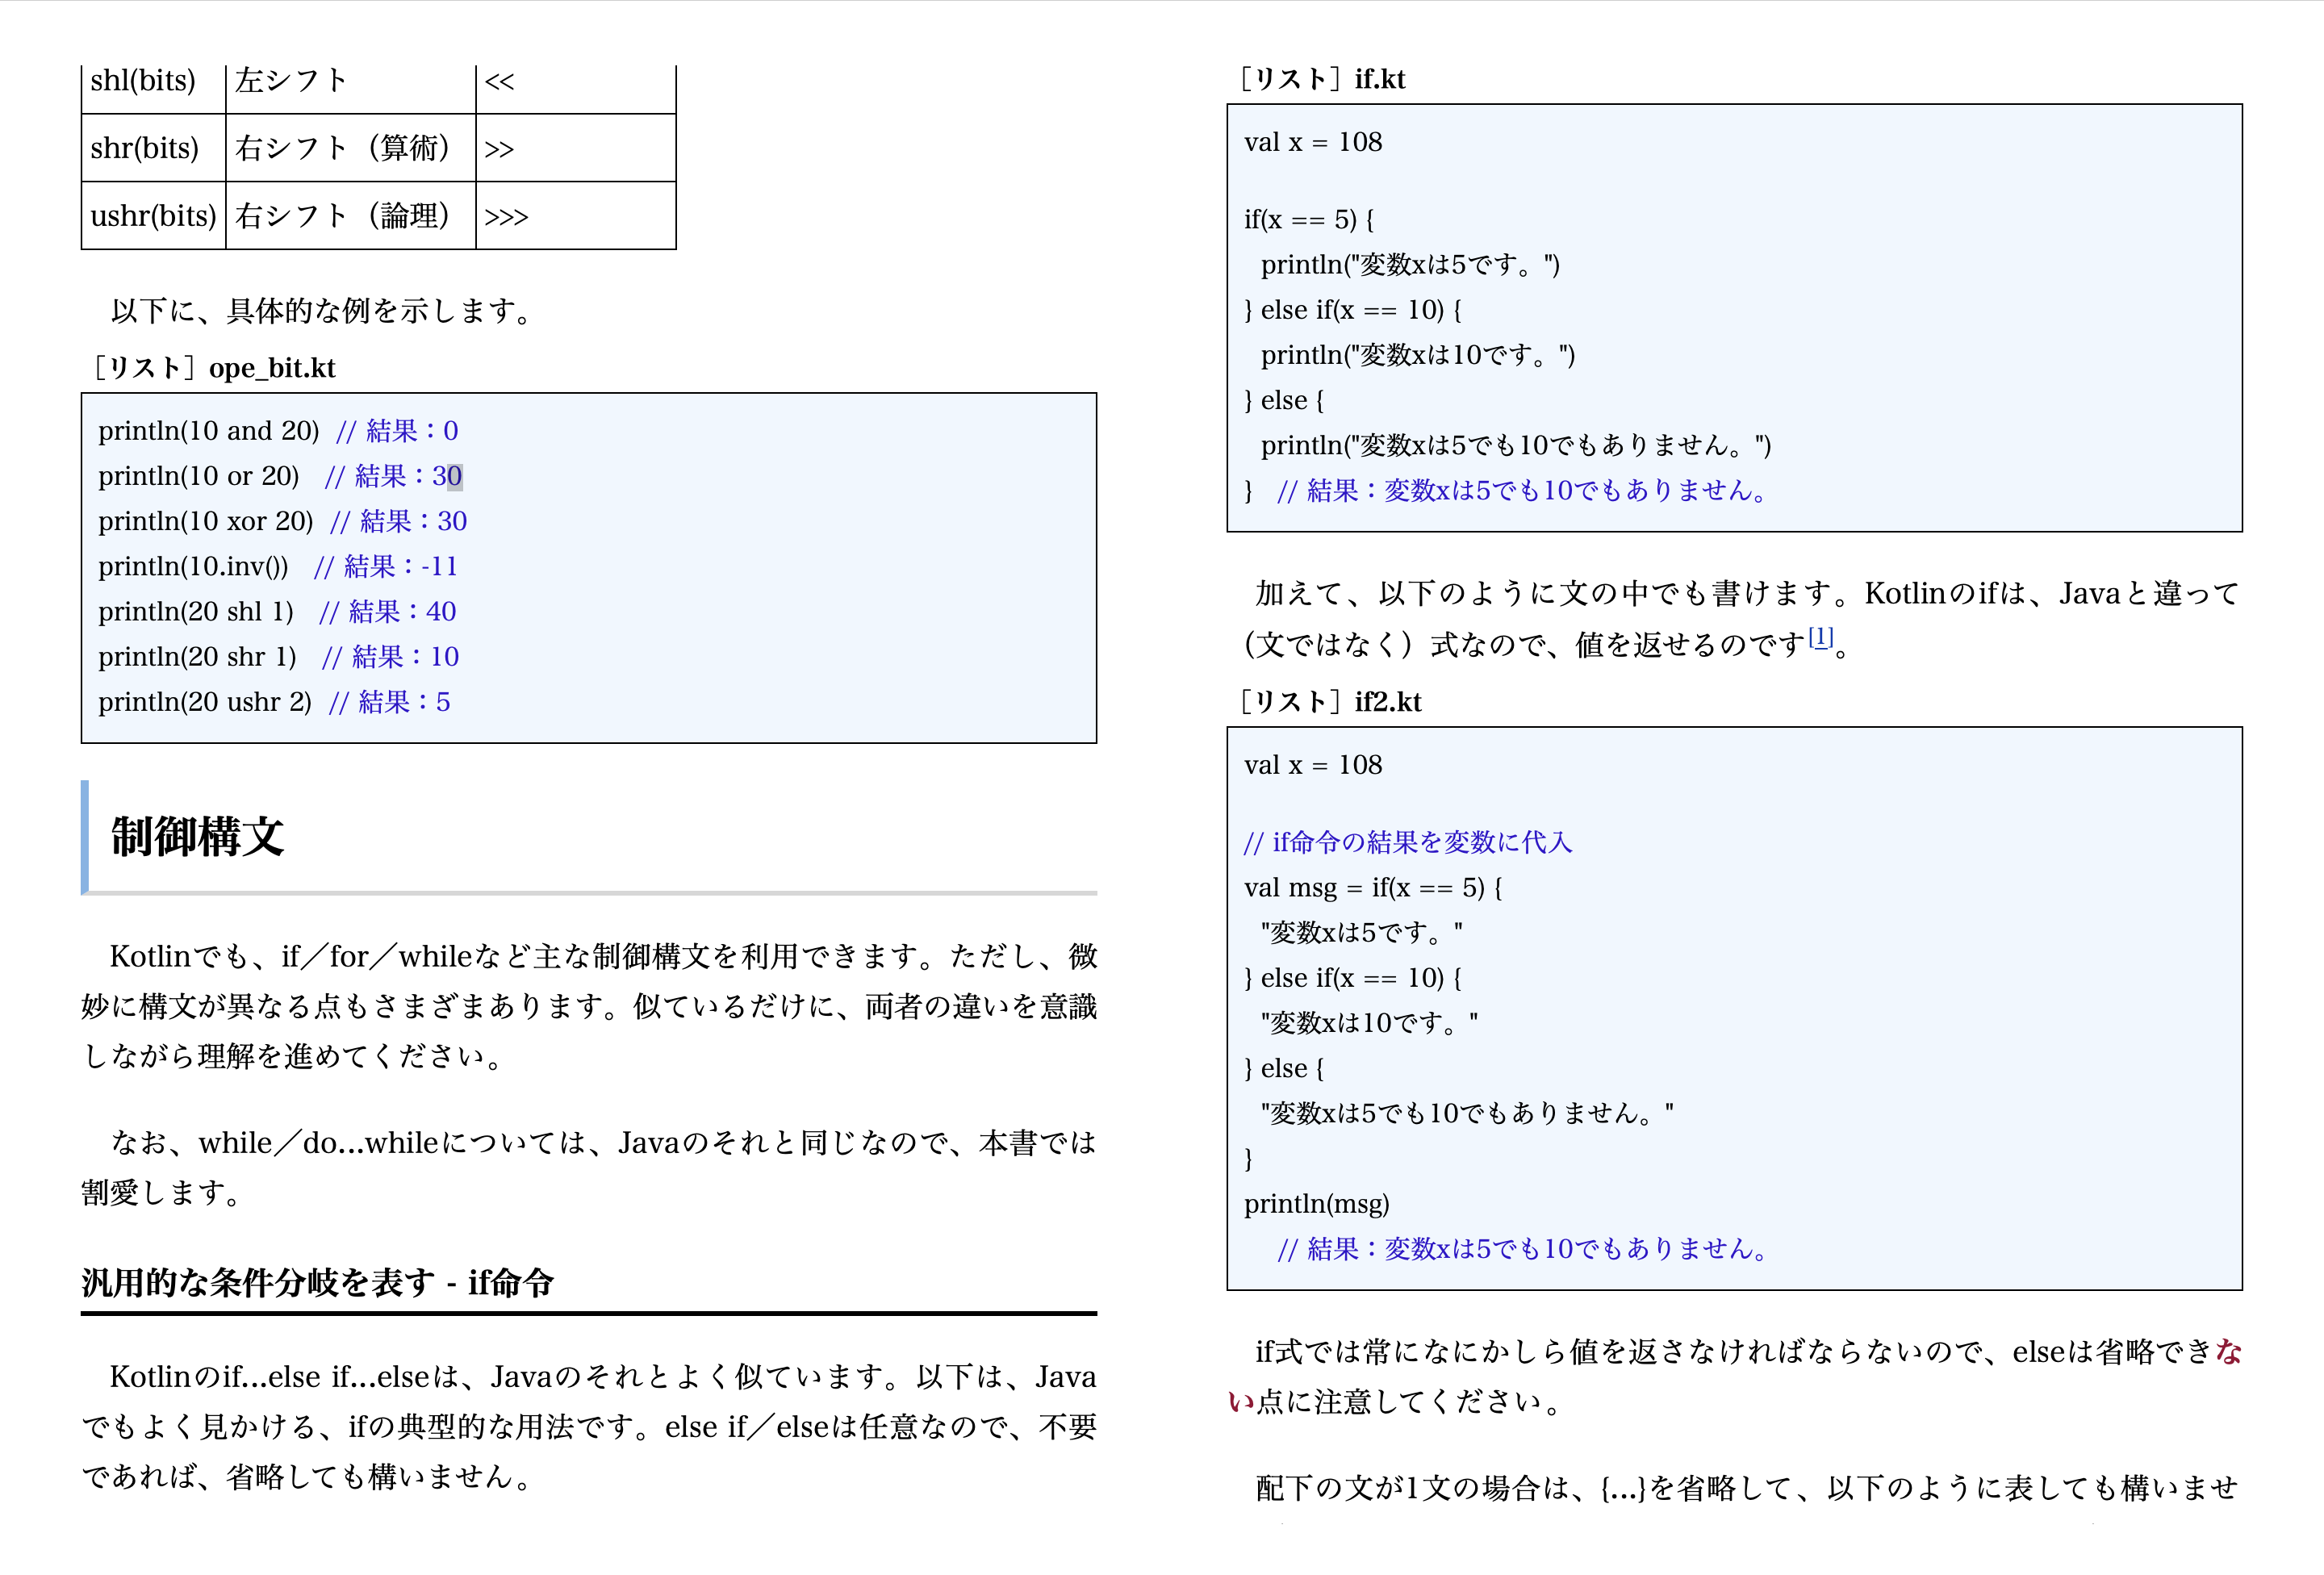

In [56]:
pyautogui.screenshot(region=(286, 73, 2880, 1952))

In [58]:
sc = pyautogui.screenshot(region=(286, 73, 2880, 1952))
sc.save("test.png")

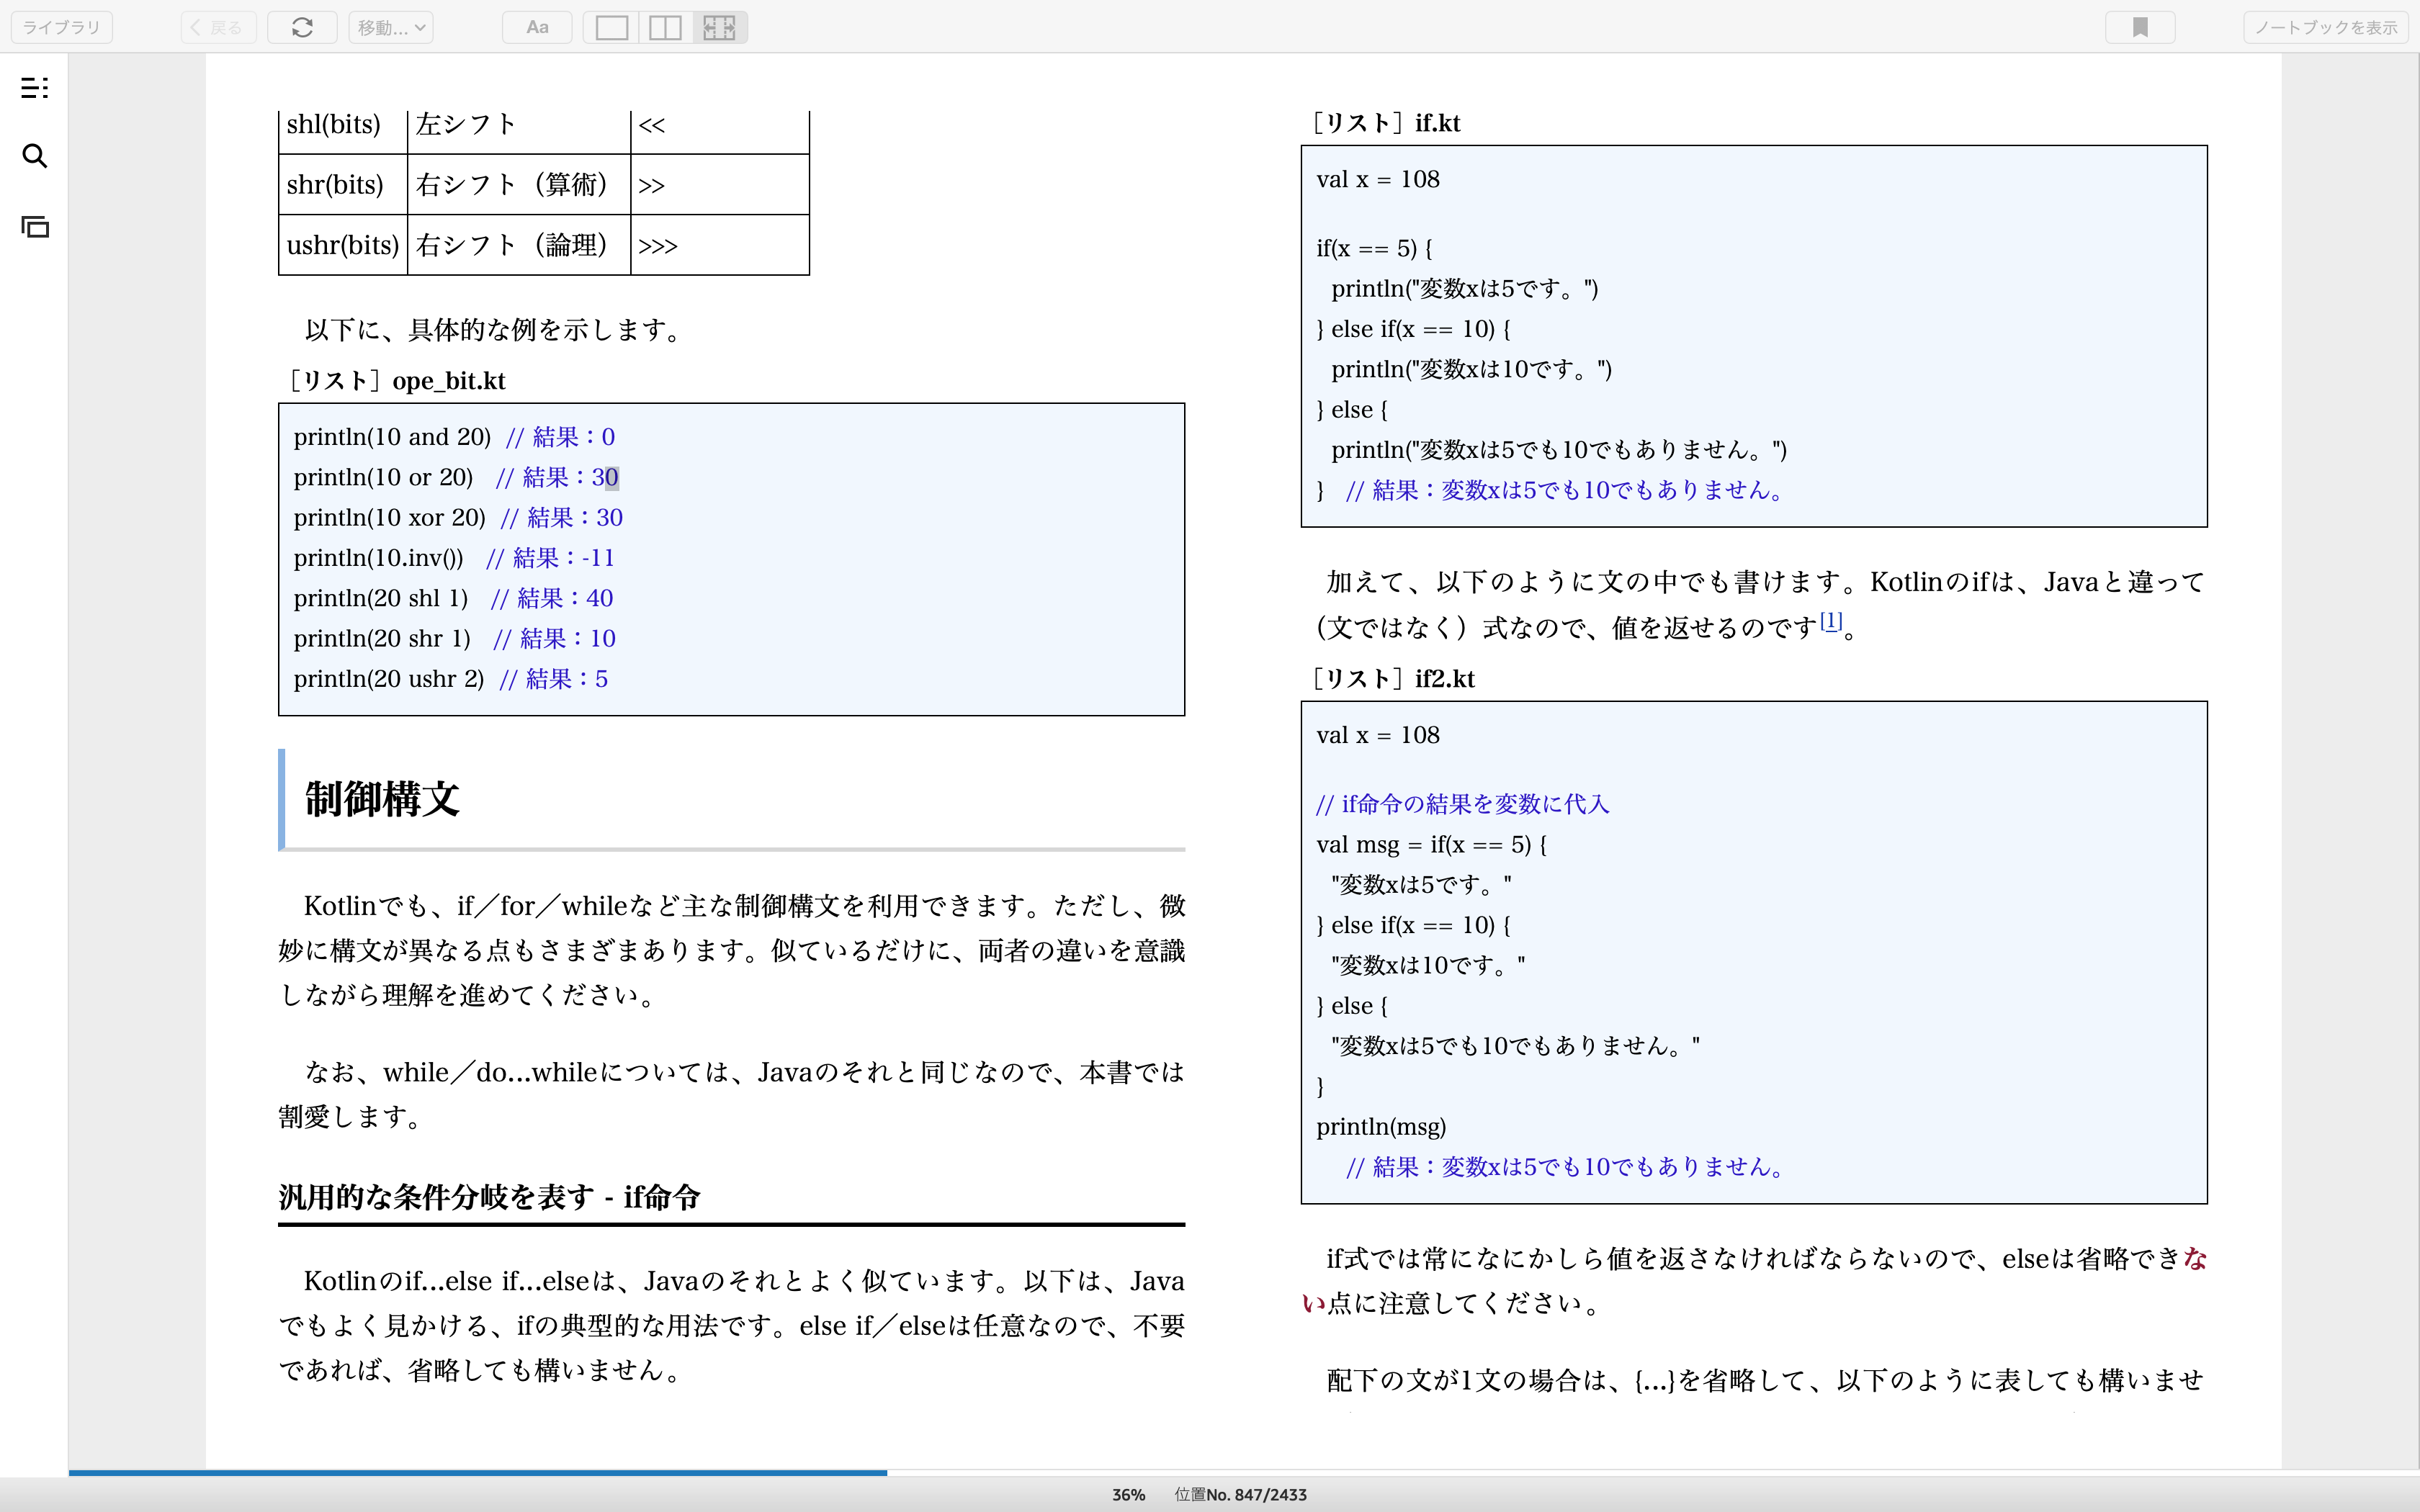

In [53]:
pyautogui.screenshot()

まとめる

Count:1
Count:2
Done


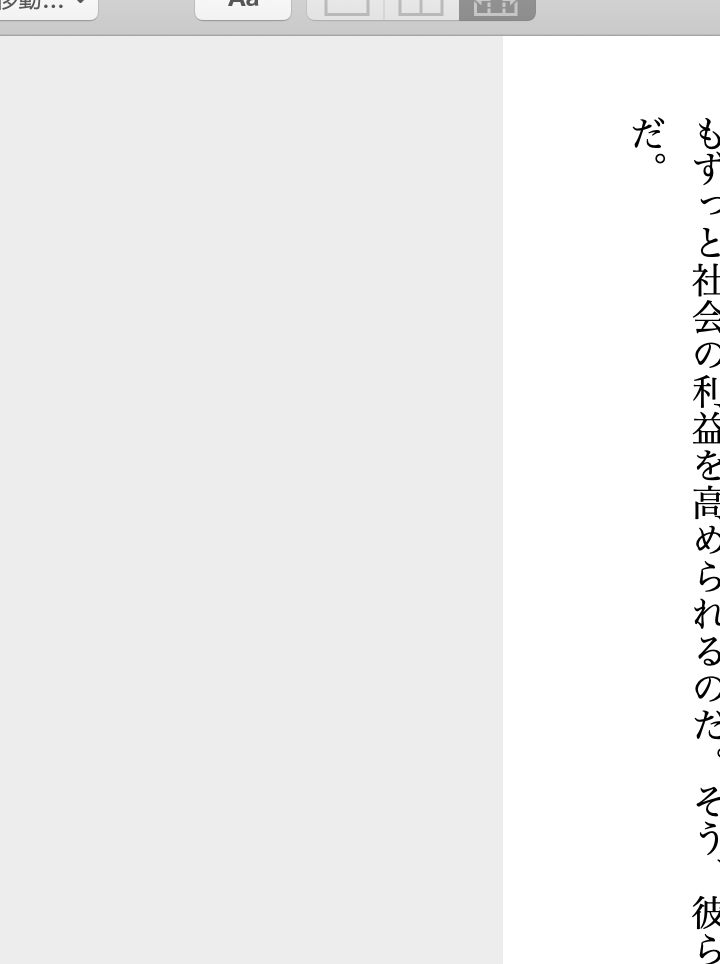

In [59]:
list_point = []
class Monitor:
    def __init__(self):
        self.counter = 0
        self.over_count = 2

    def count(self):
        self.counter += 1
        print('Count:{0}'.format(self.counter))

    def is_over(self):
        return True if self.counter >= self.over_count else False

    def call(self):
        self.count()
        if self.is_over():
            print('Done')
            self.listener.stop() # 規定回数過ぎたら終了

    def on_click(self, x, y, button, pressed):
        #print('{0} at {1}'.format('Pressed' if pressed else 'Released',(x,y)))
        list_point.append((x, y))
        if pressed:
            self.call()

    def start(self):
        with mouse.Listener(
            on_click=self.on_click) as self.listener:
            self.listener.join()

monitor = Monitor()
monitor.start()

#座標計算
x1 = list_point[0][0]
y1 = list_point[0][1]
x2 = list_point[2][0]
y2 = list_point[2][1]
width = x2 - x1
hight = y2 - y1

pyautogui.screenshot(region=(x1, y1, width, hight))

In [61]:
#なぜかパラメータの値を2倍にしたらうまくいく。

Count:1
Count:2
Done


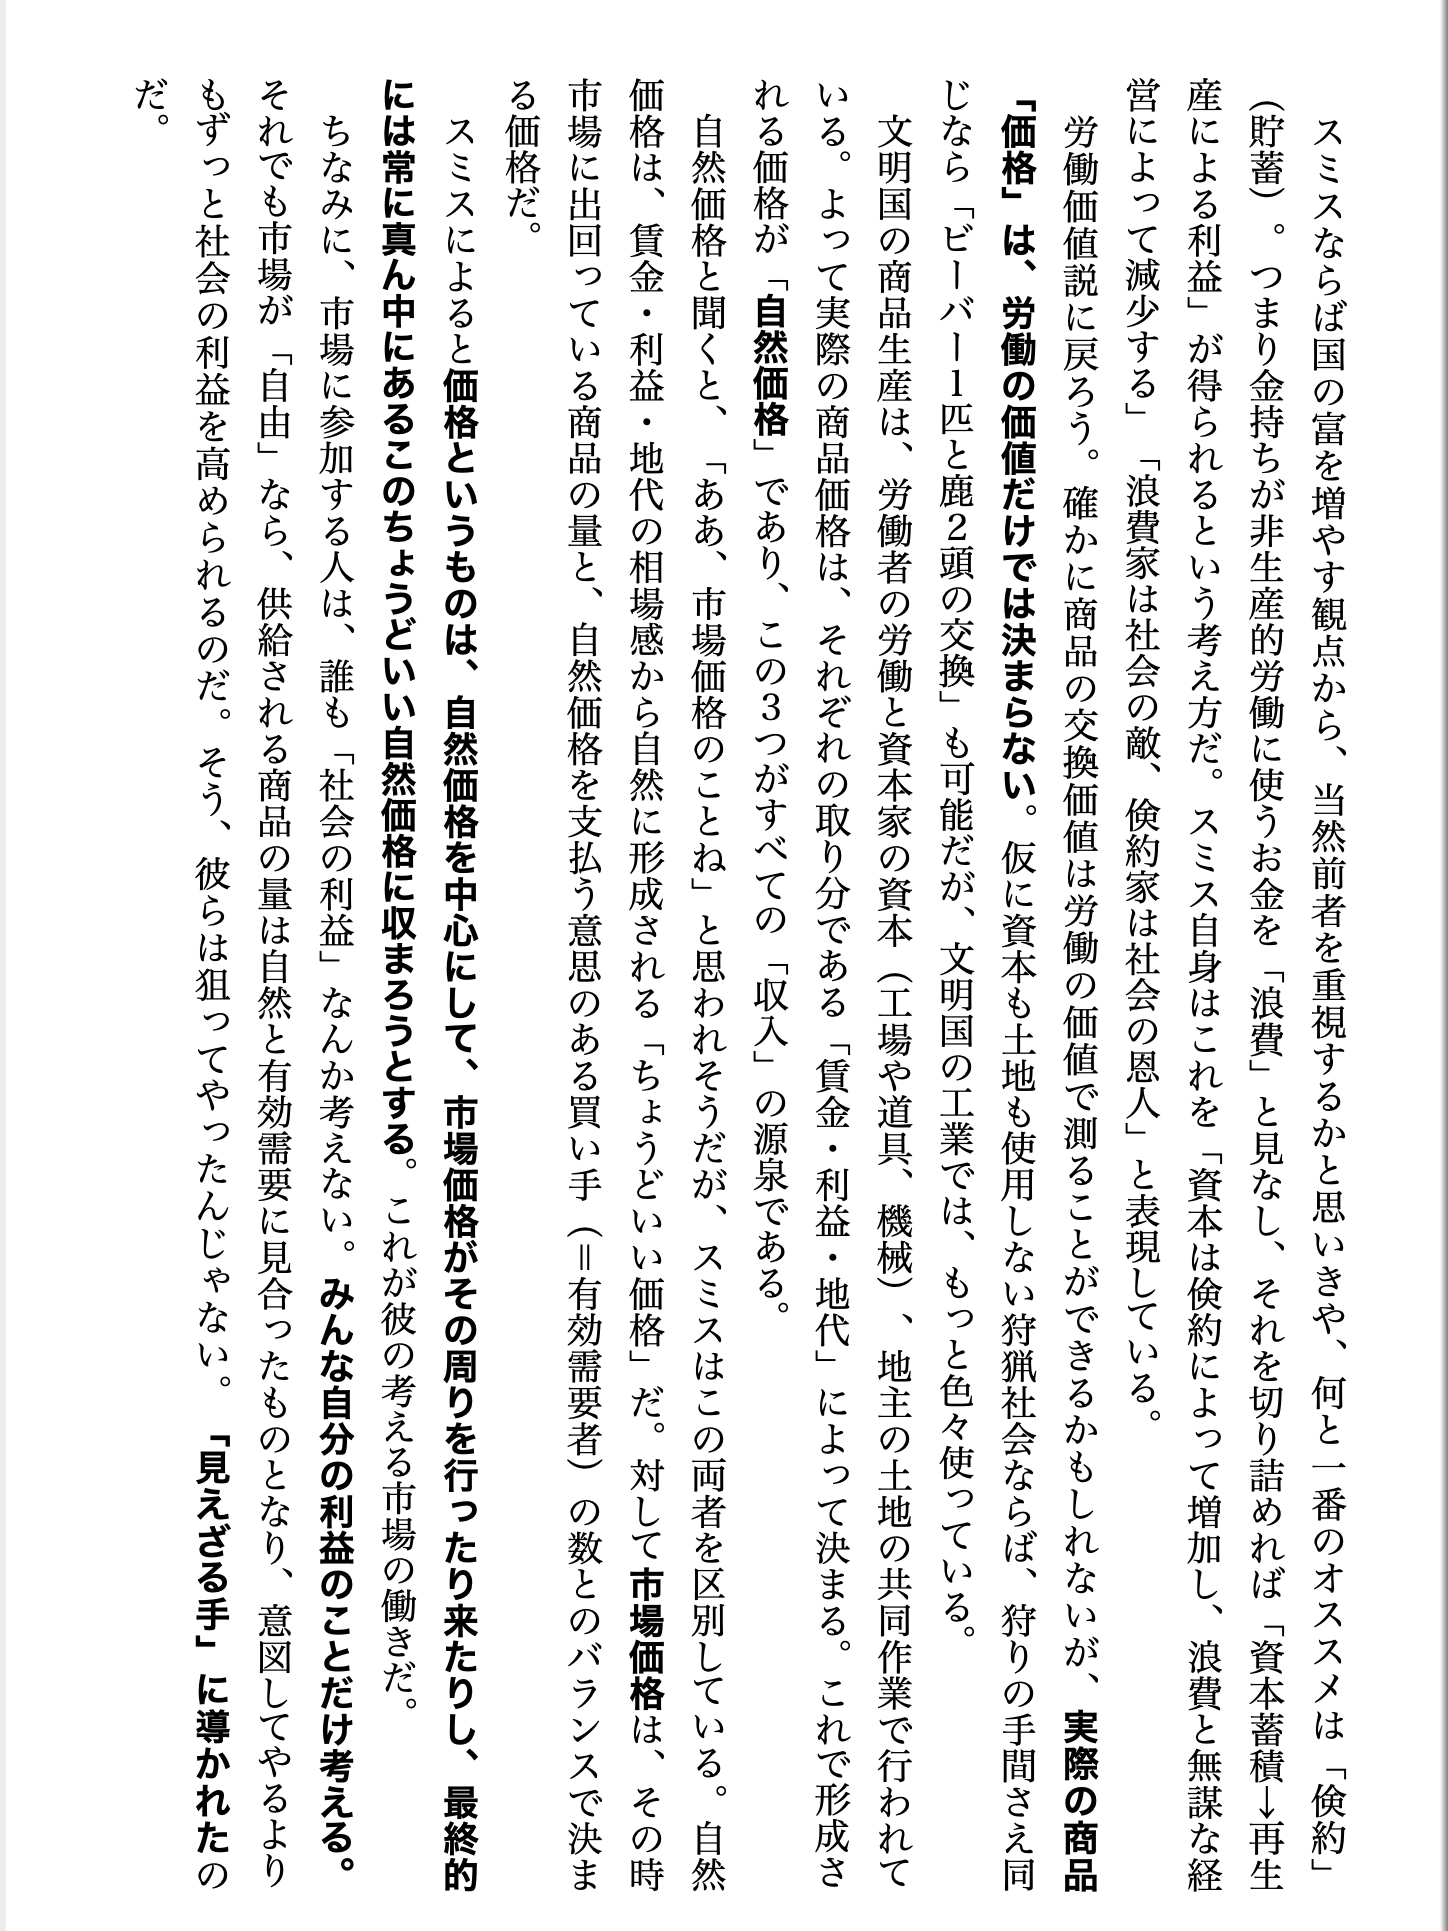

In [60]:
list_point = []
class Monitor:
    def __init__(self):
        self.counter = 0
        self.over_count = 2

    def count(self):
        self.counter += 1
        print('Count:{0}'.format(self.counter))

    def is_over(self):
        return True if self.counter >= self.over_count else False

    def call(self):
        self.count()
        if self.is_over():
            print('Done')
            self.listener.stop() # 規定回数過ぎたら終了

    def on_click(self, x, y, button, pressed):
        #print('{0} at {1}'.format('Pressed' if pressed else 'Released',(x,y)))
        list_point.append((x, y))
        if pressed:
            self.call()

    def start(self):
        with mouse.Listener(
            on_click=self.on_click) as self.listener:
            self.listener.join()

monitor = Monitor()
monitor.start()

#座標計算
x1 = list_point[0][0]
y1 = list_point[0][1]
x2 = list_point[2][0]
y2 = list_point[2][1]
width = x2 - x1
hight = y2 - y1

pyautogui.screenshot(region=(x1*2, y1*2, width*2, hight*2))

## 前回までのとあわせる

引数で座標取得するかどうか決めたい

→argparseを使用する

In [ ]:
import argparse

parser = argparse.ArgumentParser()
parser.add_argument('-pos', '--position', action='store_true')

args = parser.parse_args()
print(args.position)

In [ ]:
if args.position==True:
    list_point = []
    class Monitor:
        def __init__(self):
            self.counter = 0
            #マウスクリック取得は2回
            self.over_count = 2

        def count(self):
            self.counter += 1
            print('Count:{0}'.format(self.counter))

        def is_over(self):
            return True if self.counter >= self.over_count else False

        def call(self):
            self.count()
            if self.is_over():
                print('Done')
                self.listener.stop() # 規定回数過ぎたら終了

        def on_click(self, x, y, button, pressed):
            #print('{0} at {1}'.format('Pressed' if pressed else 'Released',(x,y)))
            list_point.append((x, y))
            if pressed:
                self.call()

        def start(self):
            with mouse.Listener(
                on_click=self.on_click) as self.listener:
                self.listener.join()

    monitor = Monitor()
    monitor.start()

    #座標計算
    x1 = list_point[0][0]
    y1 = list_point[0][1]
    x2 = list_point[2][0]
    y2 = list_point[2][1]
    width = x2 - x1
    hight = y2 - y1

    pyautogui.screenshot(region=(x1*2, y1*2, width*2, hight*2))
    
    
else:
    

screenshot_pos.py

In [ ]:
#使い方
#python screenshot_full.py 右か左か ページ数 保存先のパス
#python screenshot.py_full right 342 /Users/yamada/SS/Pyautogui_SS/test_dir

import argparse
import pyautogui
import time
import os
#マウスのクリック取得
from pynput import mouse
#pdfへ変換
import glob
from PIL import Image
import img2pdf
#pdfをまとめる
import re
import PyPDF2
#ディレクトリの削除、移動
import shutil

#コマンドライン引数の取得
parser = argparse.ArgumentParser()
parser.add_argument('-pos', '--position', action='store_true')
parser.add_argument('-lr')
parser.add_argument('-p', '--pages')
parser.add_argument('-dir', '--path_dir')
parser.add_argument('-time', '--time_sleep')
parser.add_argument('-title')
args = parser.parse_args()

right_left = args.lr
num_pages = int(args.pages)
path_dir = args.path_dir
time_sleep = float(args.time_sleep)
title = args.title
#保存先のディレクトリを作成
os.makedirs(path_dir)

#座標取得かどうか場合分け
if args.position==True:
    list_point = []
    class Monitor:
        def __init__(self):
            self.counter = 0
            #マウスクリック取得は2回
            self.over_count = 2

        def count(self):
            self.counter += 1
            print('Count:{0}'.format(self.counter))

        def is_over(self):
            return True if self.counter >= self.over_count else False

        def call(self):
            self.count()
            if self.is_over():
                print('Done')
                self.listener.stop() # 規定回数過ぎたら終了

        def on_click(self, x, y, button, pressed):
            #print('{0} at {1}'.format('Pressed' if pressed else 'Released',(x,y)))
            list_point.append((x, y))
            if pressed:
                self.call()

        def start(self):
            with mouse.Listener(
                on_click=self.on_click) as self.listener:
                self.listener.join()

    monitor = Monitor()
    print("mouse click start")
    monitor.start()

    #座標計算
    x1 = list_point[0][0]
    y1 = list_point[0][1]
    x2 = list_point[2][0]
    y2 = list_point[2][1]
    width = x2 - x1
    hight = y2 - y1

    #スクリーンショット
    for i in range(num_pages):
        time.sleep(time_sleep)
        # Take and save a screenshot
        sc = pyautogui.screenshot(region=(x1*2, y1*2, width*2, hight*2))
        sc.save(path_dir + '/page_{}.png'.format(i))
        # Turn page
        pyautogui.press(right_left)
    
else:
    # Sleep for 5 seconds to allow me to open book
    time.sleep(5)
    #スクリーンショット
    for i in range(num_pages):
        time.sleep(time_sleep)
        # Take and save a screenshot
        sc = pyautogui.screenshot()
        sc.save(path_dir + '/page_{}.png'.format(i))
        # Turn page
        pyautogui.press(right_left)

#png→jpg
path_ = path_dir + '/*.png'
#保存先のディレクトリを作成
os.makedirs(path_dir + "/jpg")

list_png = glob.glob(path_)

for i in list_png:
    name, ext = os.path.splitext(i)
    name_png = name.split("/")[-1] + ".jpg"
    
    #変換
    im = Image.open(i)
    rgb_im = im.convert('RGB')
    rgb_im.save(path_dir + "/jpg/" + name_png)

#jpg→pdf
path_jpg = path_dir + "/jpg/*.jpg"
list_jpg = glob.glob(path_jpg)
#保存先のディレクトリを作成
os.makedirs(path_dir + "/pdf")

for i in list_jpg:
    name, ext = os.path.splitext(i)
    name_pdf = name.split("/")[-1] + ".pdf"
    
    #変換
    #Pillowモジュールを使用し画像の読み込み
    img = Image.open(i)
    #画像→pdfファイルに変換
    cov_pdf = img2pdf.convert(i)
    #pdfファイルを読み込み（pdf_nameで指定したpdfがない場合、pdf_nameをファイル名として新規にpdfファイルを作成）
    file = open(path_dir + "/pdf/" + name_pdf, "wb")
    #pdfファイルを書き込み
    file.write(cov_pdf)

    #開いているファイルを閉じる
    img.close()
    file.close()
    
#複数のpdfファイルを結合する
pdf_path = path_dir + "/pdf/"

merge = PyPDF2.PdfFileMerger()
for j in sorted(os.listdir(pdf_path), key=lambda s: int(re.search(r'\d+', s).group())):
    merge.append(pdf_path + "/" + j)
merge.write(path_dir + '/' + title + '.pdf')
merge.close()
print("変換終了")

#すべて終了後、all.pdf以外のファイル、ディレクトリを削除する
shutil.move(path_dir + '/' + title + '.pdf', path_dir + '/../')
shutil.rmtree(path_dir)

In [65]:
region = False
pyautogui.screenshot(region=False)

TypeError: object of type 'bool' has no len()